# Introduction to matplotlib

## Overview
- **Teaching:** 5 min
- **Exercises:** 10 min

**Questions**
* How do I plot from Pandas matplotlib?
* Why should I use a progammatic approach to processing data and producing plots?

**Objectives**
* See how to quickly plot from a data frame.
* Use the `plot`, `bar` and `scatter` functions to produce different plots.

Plotting data in NumPy and pandas is handled by an external Python module called *matplotlib*. Like NumPy and pandas it is a large library and has been around for a while (first released in 2003). Hence we won't cover all its functionality in this lesson.

To see the wide range of possibilities you have with matplotlib see [matplotlib example gallery](http://matplotlib.org/gallery.html), [Nicolas P. Rougier's tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots) and [Ben Root's tutorial](http://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part2-Plotting_Methods_Overview.ipynb) after the course.

Here we will cover the basic uses of it and how it integrates with NumPy and pandas. While working through these examples you may want to refer to the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html).

## Plotting using NumPy and matplotlib

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. As with both NumPy and pandas, there is a conventional way to import matplot lib, which is as follows:

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

## Plotting using pandas and matplotlib

First we import pandas in the same way as we did previously.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` method as we saw above) but for extra functionality you need to import the matplotlib interface itself as well (but we already did that above).

We first need to import some data to plot. Let's start with the data from the end of the pandas section (available from [cetml1659on.dat](../data/cetml1659on.dat)) and import it into a `DataFrame`. This is also the solution to the last exercise in the previous section.

In [3]:
csv_file = '../data/cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter, for example by setting the axis labels using the `plt.ylabel()` function before displaying it with `plt.show()`.

As above, matplotlib operates on a single global state and calling any function on `plt` will alter that state. Calling `df.plot()` sets the *currently operating* plot. `plt.ylabel()` then alters that state and `plt.show()` displays it.

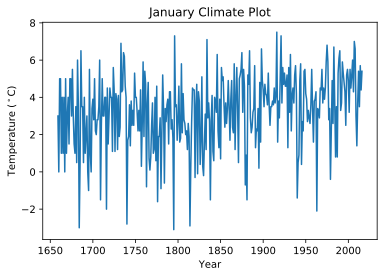

In [4]:
df['JAN'].plot()

plt.title('January Climate Plot')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Exercise: Summer climate
* Try reproducing the plot above but for the month of June.
* Try putting in two `plot()` calls with different months (both January and June for example) before calling `show()`.
* Add a legend to distinguish the two lines.

## Solution: Summer climate
The following commented code addresses all the points of the exercise
```python
# Import the data 
csv_file = 'cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )

# Plot the January and June values
df['JAN'].plot()
df['JUN'].plot()

# Add a title and axes labels
plt.title('Summer and Winter Climate Plots')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')

# Add a legend
plt.legend()

plt.show()
```
and produces the following plot:
![](../images/summer_climate.png)

## Bar charts

Matplotlib can plot more than just line graphs, another plot type is a bar chart. We will construct a bar chart of the average temperature per decade.

We start by adding a new column to the data frame which represents the decade. We create it by taking the index (which is a list of years), converting each element to a string and then replacing the fourth character with a `'0'`.

In [5]:
years = Series(df.index, index=df.index).apply(str)
decade = years.apply(lambda x: x[:3]+'0')

df['decade'] = decade
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


## Info: Lambda functions
You may be wondering how
```python
lambda x: x[:3]+'0'
```
replaces the fourth character with a `'0'`. This is through the use of Python lambda functions, which are documented [here](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions). In this case using a lambda function is a quick way of succinctly writing a function (with no name) in one line. The following is an equivalent, but longer way of doing the same thing:
```python
def year2decade(year):
    '''Takes a year as a string and returns the decade, also as a string
    '''
    decade = year[:3] + '0'
    return decade

decade = years.apply(year2decade)
```
.

Once we have our decade column, we can use pandas `groupby()` function to gather our data by decade and then aggregate it by taking the mean of each decade.

In [6]:
by_decade = df.groupby('decade')
agg = by_decade.aggregate(np.mean)

agg.head()

NameError: name 'np' is not defined

At this point, `agg` is a standard pandas `DataFrame` so we can plot it like any other, by putting `.bar` after the `plot` call:

In [ ]:
agg.YEAR.plot.bar()

plt.title('Average temperature per decade')
plt.xlabel('Decade')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Exercise: Other graphs

1. Modify the above code to plot a bar chart of the average temperature per *century*.

2. Plot a *histogram* of the average annual temperature. Make sure that the x-axis is labelled correctly.
Hint: Look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the right command to run.
 
3. Plot a scatter plot of each year's February temperature plotted against that year's January temperature. Is there an obvious correlation?

## Solution: Other graphs
1.Code for a bar chart of average temperature per century:

```python
# Import the data file
csv_file = 'cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )

# Add century column
years = Series(df.index, index=df.index).apply(str)
century = years.apply(lambda x: x[:2]+'00')
df['century'] = century

# Group data by century
by_century = df.groupby('century')
agg = by_century.aggregate(np.mean)

# Plot bar chart
agg.YEAR.plot.bar()

# Label axes
plt.title('Average temperature per century')
plt.xlabel('Century')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
```
which produces the plot:
![](../images/other_graphs_1.png)

## Solution: Other graphs
2.Code for a histogram of the average annual temperature:

```python
# Assume we have already imported the data as df

# Look at the year column of our data frame and plot histogram
df['YEAR'].hist()

# Label axes
plt.title('Histogram of average annual temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Frequency')

plt.show()
```

which produces the plot:
![](../images/other_graphs_2.png)

## Solution: Other graphs
3.Code to plot a scatter diagram of each year's February temperature plotted against that year's January temperature:

```python
# Assume we have already imported the data as df

# Plot the data frame's February values against its January values
df.plot.scatter(x='JAN', y='FEB')

# Label axes
plt.title('Scatter diagram of February temperature against January temperature')
plt.xlabel(r'Temperature in January($^\circ$C)')
plt.ylabel(r'Temperature in February($^\circ$C)')

plt.show()
```
which produces the plot:
![](../images/other_graphs_3.png)

## Key Points
* We can plot a function quickly using `plot.plot(x, y)`.
* We can (and should) add a title and axes labels to our plots.
* The `bar()` function creates bar charts.
* The `hist()` function creates histograms.
* The `scatter()` function creates scatter diagrams.